# Measure Mueller Matrix with Camera

## Preparation

Start by loading the required modules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datetime
import cv2
from PIL import Image
from py_lab.setups.polarimeter import Polarimeter, degrees
from py_lab.config import CONF_POLARIMETER
from py_lab.camera import Camera
from py_pol.mueller import Mueller, degrees, create_Mueller, Stokes

number of processors: 4
total memory        : 7.9 Gb
available memory    : 54 %
max frequency       : 3401 GHz


## Folder to save data

In [3]:
%cd D:\Experimentos\Medidas_2D

D:\Experimentos\Medidas_2D


## Initialize Polarimeter Object

Use_daca as false to measure with the camera, even though we use Reference PHD

In [4]:
pol = Polarimeter(use_daca=False)

Background cleared


In [5]:
pol.Open()

DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 3
DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 5
DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 4
DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 6
Background cleared
Background cleared
Background cleared
Property uEye cannot be automatically handled by Resolution
uEye camera can't set the resolution. Use Set_ROI method instead.
Background cleared


### Check Motor

In [6]:
pol.motor.Move_Absolute(pos=360*np.ones(4, dtype=float), move_time=5, units="deg")

array([360., 360., 360., 360.])

In [7]:
pol.motor.Move_Absolute(pos=1)

array([0.994, 0.994, 0.994, 0.994])

In [8]:
pol.motor.Home()

## Photodiode and Camera Background

In [9]:
pol.camera.Start_Live(view=True)

We have to measure and record the signal measured by the photodetector and camera with the diode offline. The experiment should be as covered as possible to avoid light from unknown sources. Also, lab lights must be off.

In [10]:
# Apagar diodo
pol.daca.Get_Signal(is_background=True, verbose=True)
_ = pol.camera.Get_Image(is_background=True, stadistics=True)

Reference:  0.23985448991000002
Signal:  1.1293214692800002
Staistics of the image:
  - Max:  2.0.
  - Min:  0.0.
  - Mean: 0.0
  - Std:  0.0


## Get the Intensity to Normalice

## Just in case of interest, define the region of interest (ROI)

If just want a determinated zone, select it

In [11]:
width = 100
height = 100
x0 = 1900
y0 = 1200
pol.camera.Set_ROI(width=width, height=height, x=x0, y=y0)

The value of the property resolution is [2560 1920].


Get the Background of the Roi

In [12]:
_ = pol.camera.Get_Image(is_background=True, stadistics=False)

Save the value and draw the intensity to secure it's focused

The value of the property Resolution is [2560 1920].


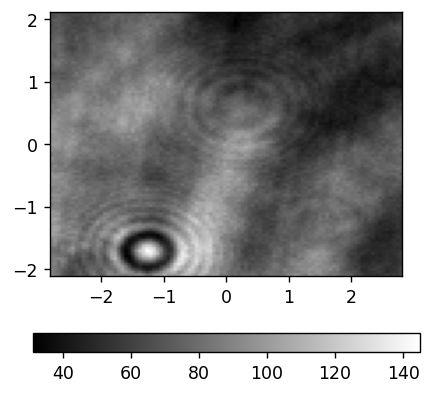

In [13]:
pol.Measure_Intensity(dim=2)

## Calculate and save in another directory

In [14]:
%cd D:\Experimentos\Medidas_2D\Pruebas_05_05_21

[WinError 2] El sistema no puede encontrar el archivo especificado: 'D:\\Experimentos\\Medidas_2D\\Pruebas_05_05_21'
D:\Experimentos\Medidas_2D


## Power reference

The power reference is taken measuring the Mueller matrix of air (reflection=False) or a calibration mirror (reflection=True).

862.026830313132 0.10158193320802099
The matrix components of M are:
The mean value of param M00 is 0.16381677108898957 +- 0.05108665322415455
The mean value of param M01 is 0.019018018760405566 +- 0.03545435645460423
The mean value of param M02 is -0.04412402748975636 +- 0.06134317150623088
The mean value of param M03 is -0.005157680655294817 +- 0.02594426386656873
The mean value of param M10 is 0.007598220289193087 +- 0.025023594144197213
The mean value of param M11 is 0.2355297480028964 +- 0.1065813132816194
The mean value of param M12 is 0.039124712591181963 +- 0.08558784258644231
The mean value of param M13 is 0.0879721195213401 +- 0.05268737604328014
The mean value of param M20 is -0.15406114772295332 +- 0.07857678774432428
The mean value of param M21 is 0.07847144595905192 +- 0.08454513551807433
The mean value of param M22 is 0.15202649954461825 +- 0.10654149898209185
The mean value of param M23 is -0.10156106896910284 +- 0.07329393056651956
The mean value of param M30 is -0.035

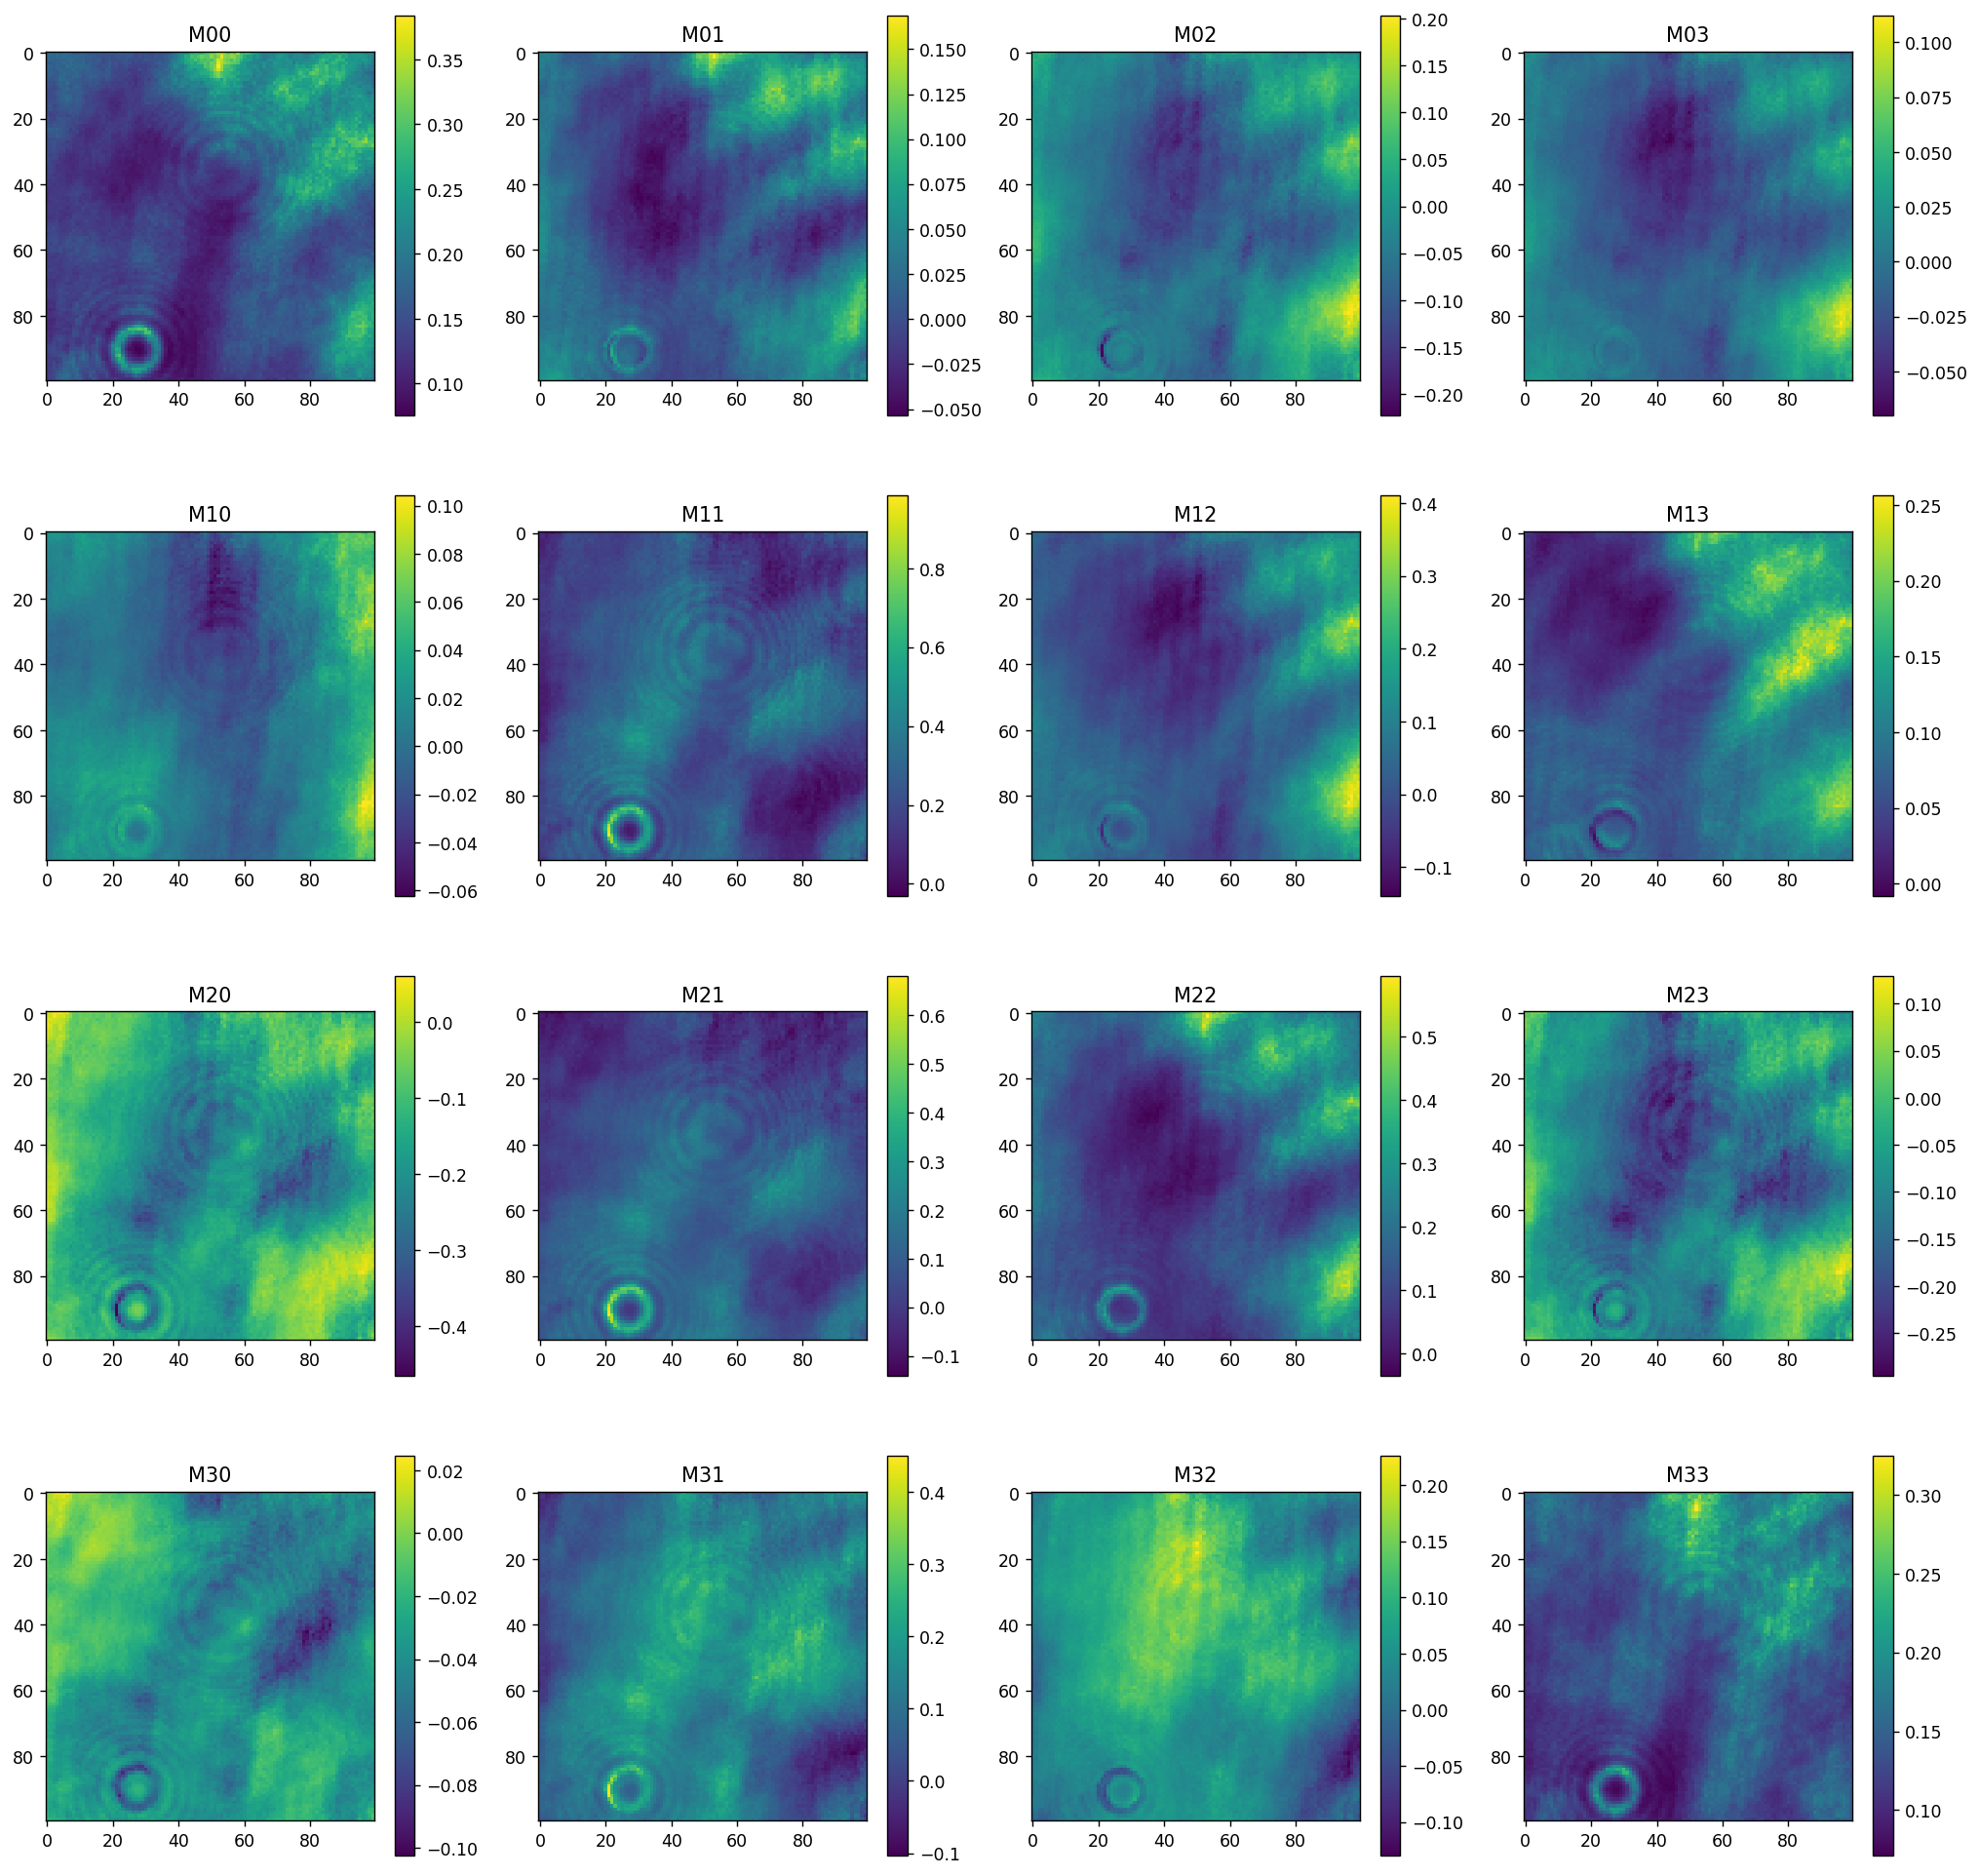

In [16]:
Mref = pol.Measure_Mueller_Matrix(dim=2,is_ref=True, reflection=True, N=20, filename="Test_Calibration_Mirror",verbose=True)

## Measure Mueller Matrix

Here we measure the Mueller matrix of any sample. Important input variables are:
* dim (int): Two Options; select 0 to measure with PHD, any other number for camera. Default: 0
* angles (str): Several options. Default: 'random'.
    * "random": Random angles.
    * 'linspace': Angles generated by linspace. N will be reduced to a number in the form of M^4 where M is an integer. 
* N (int): Number of measurements used. Default: 200.
* filter (bool): If True, the Mueller matrix is filtered to be physcally realizable. Default: True.
* reflection (bool): If True, polarimeter working on reflection, so the calibration data of the 50/50 beam splitter is used. Default: False.
* save_folder (str or None): If not None, it specifies the folder where the measurement will be saved. Default: None.
* filename (str or None): If not None, the filename where the measurement is stored. Default: None.
* verbose (bool): If True, the information is printed after performing the measurement. Default: True.

d:\software\py_pol\py_pol\mueller.py:1557: ComplexWarning: Casting complex values to real discards the imaginary part
  np.array(elem.parameters.trace(shape=False), dtype=float)


The matrix components of Inverse of M * M * Inverse of M are:
The mean value of param M00 is 0.9323896662291471 +- 0.23518917725528565
The mean value of param M01 is 0.38672462016849857 +- 0.32260926876136575
The mean value of param M02 is -0.5070804555528242 +- 0.22096393219974902
The mean value of param M03 is -0.19836575783336804 +- 0.2294233013529789
The mean value of param M10 is -0.6696861014448836 +- 0.38272837064597626
The mean value of param M11 is -0.25047689707593956 +- 0.48976302375004405
The mean value of param M12 is 0.3648199684040098 +- 0.3521961334562799
The mean value of param M13 is -0.15019132605461435 +- 0.2031278868607279
The mean value of param M20 is 0.3245580224656321 +- 0.16419251110004685
The mean value of param M21 is -0.0983062778934361 +- 0.36394401737483517
The mean value of param M22 is -0.7027489960677149 +- 0.31059308528845636
The mean value of param M23 is -0.3431044504236745 +- 0.16668822768875016
The mean value of param M30 is 0.03945697572878475 +-

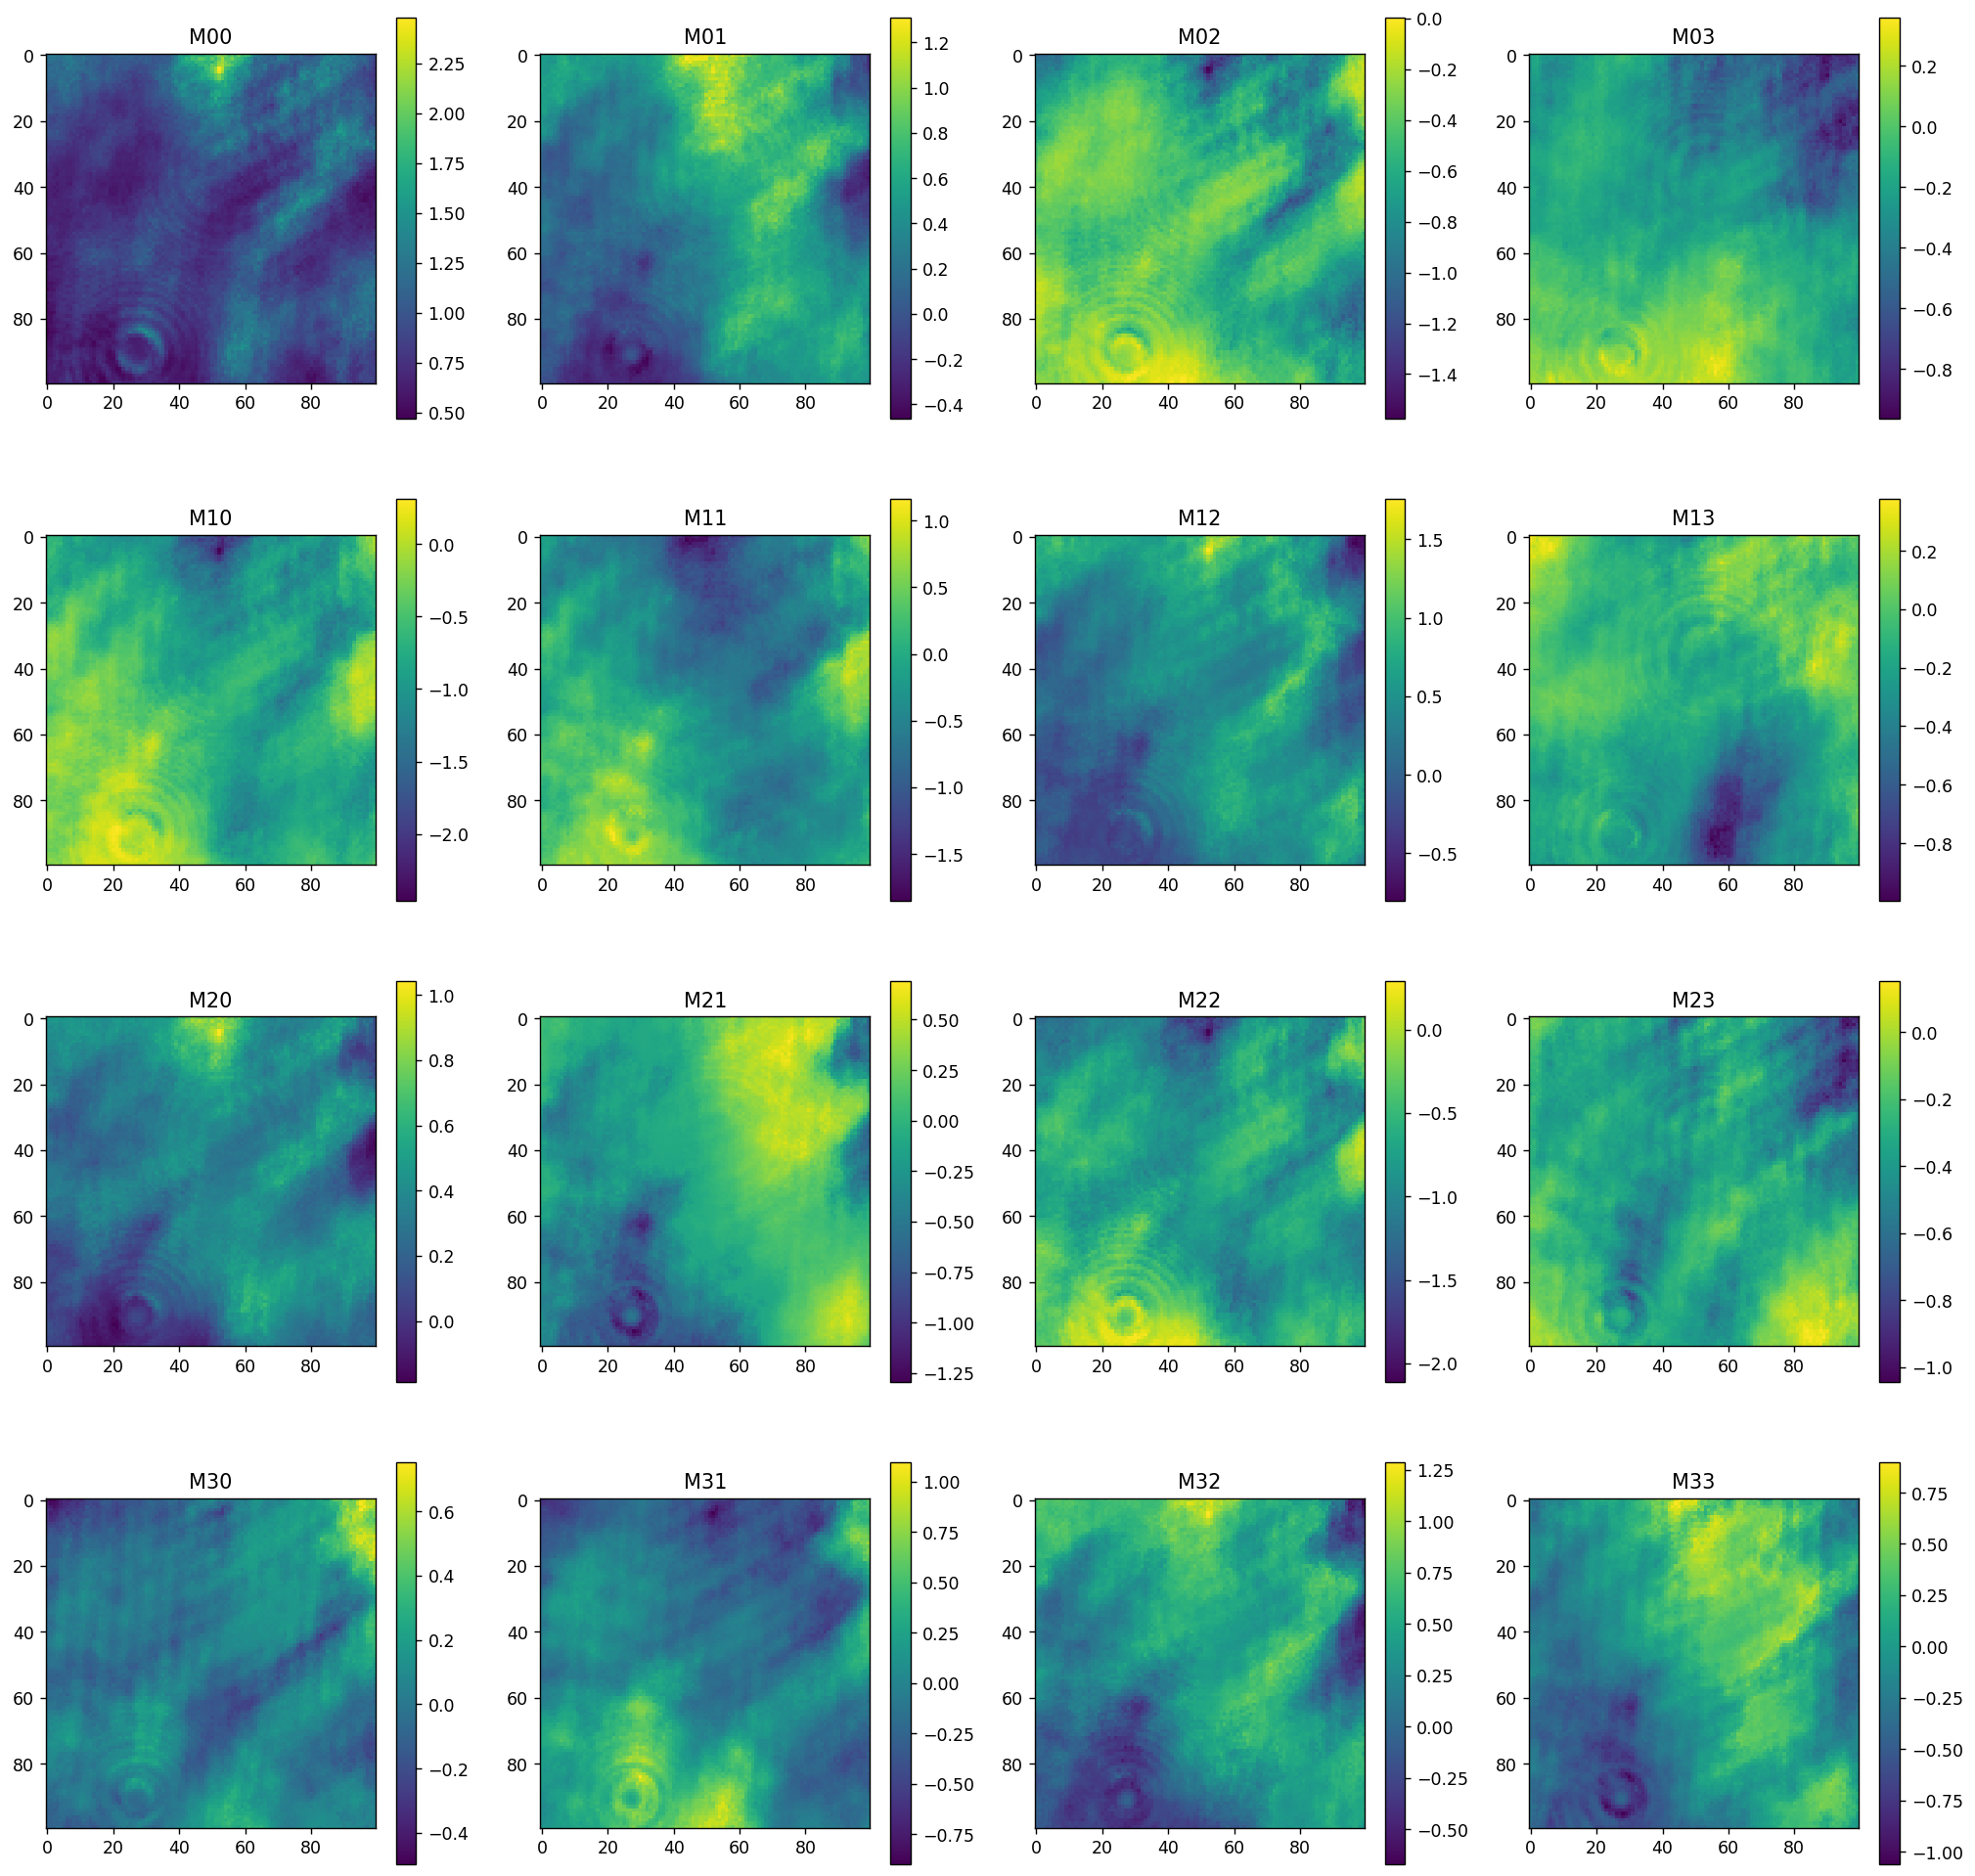

In [17]:
Msample = pol.Measure_Mueller_Matrix(dim=2,filename="Test.Espejo_45_Degrees.npz", reflection=True, N=20)

## Load Mueller Matrix

### Load the Mueller Matrix 0D

In [ ]:
## Matriz Mueller del Espejo [0D]
%cd D:\Experimentos\Medidas_0D\Medidas_22_03_10
data = np.load("Test.Espejo_45_Degrees.npz")
M_Mirror_0D_Mueller = Mueller().from_components(data["Mcomp"])

M_Mirror_0D = (data["Mcomp"])


In [ ]:
print( M_Mirror_0D.reshape(4,4),"\n\n")
print( M_Sample[0])

In [ ]:

i = 0
j = 0

M_Mirror_2D_1 = np.zeros((16,100,100))

for i in range (16):
        M_Mirror_2D_1[i,:,:] = M_Mirror_2D[i,:,:]/I_Ref_Roi
        


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [28]:
A = [[1, 4, 5, 12], 
    [-5, 8, 9, 8],
    [-6, 7, 20, 19]]

B = [[1, 4, 5, 12], 
    [-5, 8, 9, 2],
    [-6, 7, 11, 19]]
print(np.divide(A,B))

[[1.         1.         1.         1.        ]
 [1.         1.         1.         4.        ]
 [1.         1.         1.81818182 1.        ]]


In [40]:
## Get the mean Value of each Matrix
i=0
for i in range(16):
    M_Mirror_Mean[i] = np.mean(M_Mirror_2D_1[i,:,:])
# M_Mirror_Mean = M_Mirror_Mean.reshape(4,4)
## Get the normalize value of each Matrix
M_Mirror_2D_2 = np.zeros((16,100,100))


i=0
for i in range(16):
    M_Mirror_2D_2[i,:,:] = M_Mirror_2D_1[i,:,:] *  M_Mirror_0D[0] / M_Mirror_Mean[0]
    M_Mirror_Mean[i]  = np.mean(M_Mirror_2D_2[i,:,:])

NameError: name 'M_Mirror_2D_1' is not defined

In [50]:
print( M_Mirror_0D.reshape(4,4),"\n\n")
print(M_Mirror_Mean)

[[ 0.54254066 -0.02217869 -0.04294267  0.00489328]
 [ 0.00820493  0.20793557 -0.47172643 -0.07543912]
 [ 0.00722393 -0.49062167 -0.20396739 -0.12863689]
 [-0.01535967  0.08765268  0.11212574 -0.52050061]] 


[ 5.42540661e-01  3.08443250e-05 -1.00796921e-03  5.66815984e-04
 -1.66163026e-03  3.48566815e-04 -5.64117364e-05 -1.58990990e-03
  1.02861647e-03  1.20849628e-03  9.93694200e-04 -1.30563212e-03
 -5.54369321e-04  7.18191879e-04 -8.33174195e-05 -8.96849839e-04]


In [8]:
pol.Close()